In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Figure 1

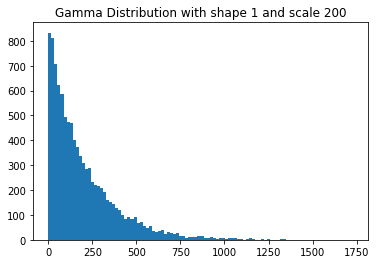

In [28]:
plt.hist(np.random.gamma(1, scale=200, size=10000), bins=100)
plt.title("Gamma Distribution with shape 1 and scale 200")
plt.show()

# Figure 2

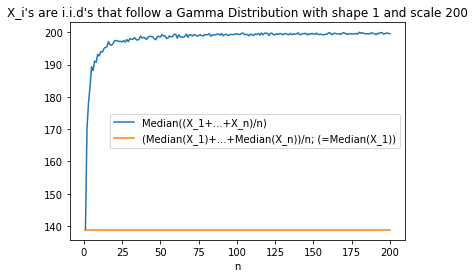

In [31]:
SCALE = 200
SHAPE = 1
median_of_average = []
MAX_NUM_OF_SUMMANDS = 200
for num_summands in np.arange(MAX_NUM_OF_SUMMANDS) + 1:
    means_for_num_summands = []
    for i in range(10000):
        means_for_num_summands.append(np.mean(np.random.gamma(
            1, scale=200, size=(num_summands))))
    median_of_average.append(np.median(means_for_num_summands))
plt.plot(np.arange(200) + 1, median_of_average,
        label="Median((X_1+...+X_n)/n)")
plt.plot(np.arange(200) + 1, [median_of_average[0]] * MAX_NUM_OF_SUMMANDS,
        label="(Median(X_1)+...+Median(X_n))/n; (=Median(X_1))")
plt.title("X_i's are i.i.d's that follow a Gamma Distribution"
          " with shape {} and scale {}".format(SHAPE, SCALE))
plt.xlabel("n")
plt.legend()
plt.show()

# Figure 3

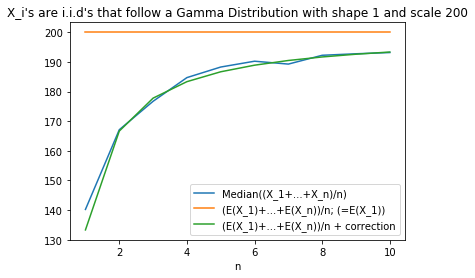

In [32]:
SCALE = 200
SHAPE = 1
# The formulas for mean, variance, and third cumulant of a gamma distribution:
mean_of_gamma = SCALE * SHAPE
var = SHAPE * (SCALE ** 2)
cumulant3 = 2 * SHAPE * (SCALE ** 3)
# Estimate median of averages:
median_of_average = []
mean_of_average_with_correction = []
MAX_NUM_SUMMANDS = 10
for num_summands in np.arange(MAX_NUM_SUMMANDS) + 1:
    means_for_num_summands = []
    # Sample a mean of num_summands i.i.d's 10000 times
    # and append to means_for_num_summands
    for i in range(10000):
        sample = np.random.gamma(SHAPE, scale=SCALE,
                                 size=num_summands)
        means_for_num_summands.append(np.mean(sample))
    median_of_average.append(np.median(means_for_num_summands))
    mean_of_average_with_correction.append(
        mean_of_gamma - cumulant3 / (6 * var * num_summands))
mean_of_average = [mean_of_gamma] * MAX_NUM_SUMMANDS
plt.plot(np.arange(MAX_NUM_SUMMANDS) + 1,
         median_of_average, label="Median((X_1+...+X_n)/n)")
plt.plot(np.arange(MAX_NUM_SUMMANDS) + 1,
         mean_of_average, label="(E(X_1)+...+E(X_n))/n; (=E(X_1))")
plt.plot(np.arange(MAX_NUM_SUMMANDS) + 1,
         mean_of_average_with_correction,
         label="(E(X_1)+...+E(X_n))/n + correction")
plt.legend()
plt.title("X_i's are i.i.d's that follow a Gamma Distribution with"
          " shape {} and scale {}".format(SHAPE, SCALE))
plt.xlabel("n")
plt.show()